<a href="https://colab.research.google.com/github/chae52/MachineLearning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_7%EC%A3%BC%EC%B0%A8_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#분류나무

##데이터 불러오기

In [2]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x=iris.drop('species', axis=1)
y=iris['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
classle=LabelEncoder()
y=classle.fit_transform(y.values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3,stratify=y,
                                            random_state=1)

##표준화

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
xtrain_std=sc.transform(xtrain)
xtest_std=sc.transform(xtest)

##적합

###CART:Gini

In [26]:
from sklearn import tree
#CART
dtc=tree.DecisionTreeClassifier(criterion='gini', max_depth=5,random_state=1)
dtc.fit(xtrain,ytrain)
ytrain_pred=dtc.predict(xtrain)
ytest_pred=dtc.predict(xtest)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytrain,ytrain_pred))
print(accuracy_score(ytest,ytest_pred))

0.9904761904761905
0.9777777777777777


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ytest_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


###C4.5:Entropy

In [18]:
#C4.5
# 과적합 사례 확인 법: max_depth 3=> 5=> 7 높일 수록 학습 데이터 정확도 올라라고 테스트 정확도 고정
dtc_C4_5=tree.DecisionTreeClassifier(criterion='entropy',max_depth=7, random_state=1)
dtc_C4_5.fit(xtrain,ytrain)
ytrain_pred_45=dtc_C4_5.predict(xtrain)
ytest_pred_45=dtc_C4_5.predict(xtest)

In [20]:
print(accuracy_score(ytrain,ytrain_pred_45))
print(accuracy_score(ytest, ytest_pred_45))
print(confusion_matrix(ytest,ytest_pred_45))

0.9809523809523809
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


##시각화

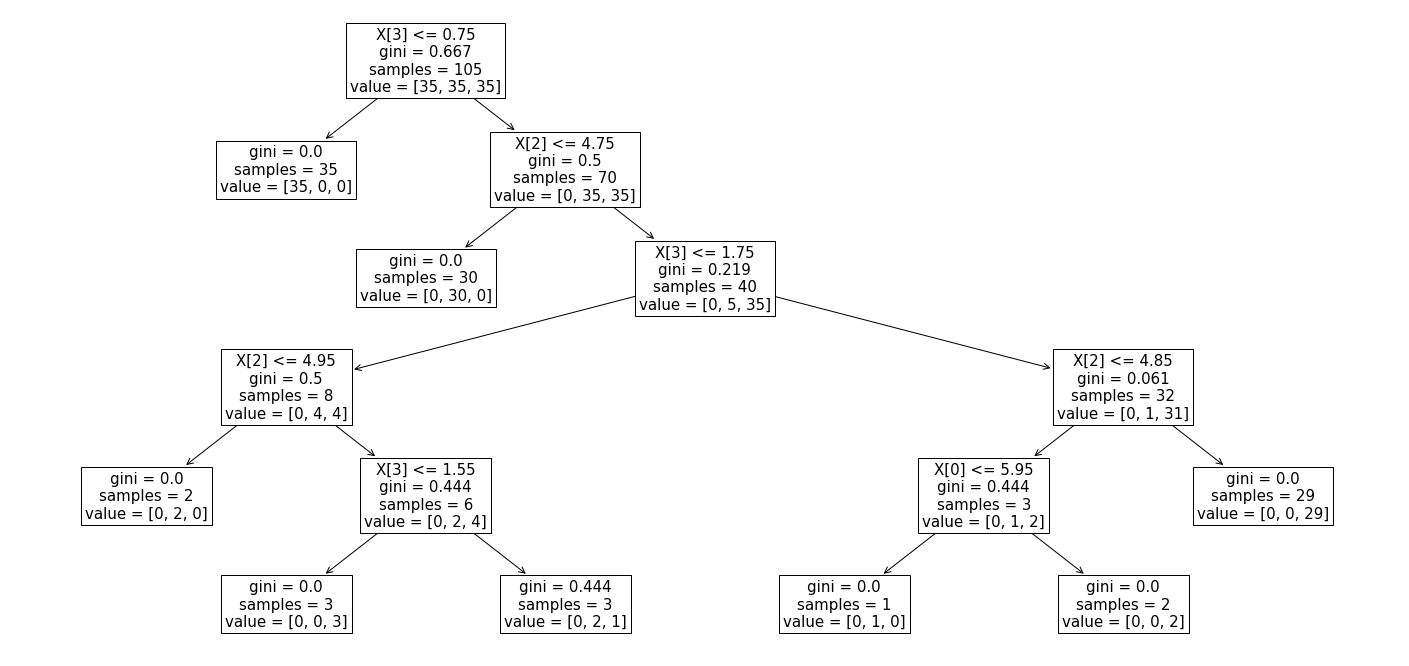

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
tree.plot_tree(dtc.fit(xtrain,ytrain),fontsize=15)

#디렉토리에 파일을 저장해버림;
#plt.savefig('tree_high_dpi',dpi=100)

[Text(697.5, 611.5500000000001, 'X[3] <= 0.75\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(523.125, 530.01, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(871.875, 530.01, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(697.5, 448.47, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(1046.25, 448.47, 'X[2] <= 5.15\nentropy = 0.544\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(871.875, 366.93, 'X[3] <= 1.85\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(697.5, 285.39000000000004, 'X[0] <= 6.5\nentropy = 1.0\nsamples = 10\nvalue = [0, 5, 5]'),
 Text(523.125, 203.85000000000002, 'X[1] <= 3.1\nentropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(348.75, 122.31000000000006, 'X[1] <= 2.75\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(174.375, 40.76999999999998, 'entropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(523.125, 40.76999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(697.5,

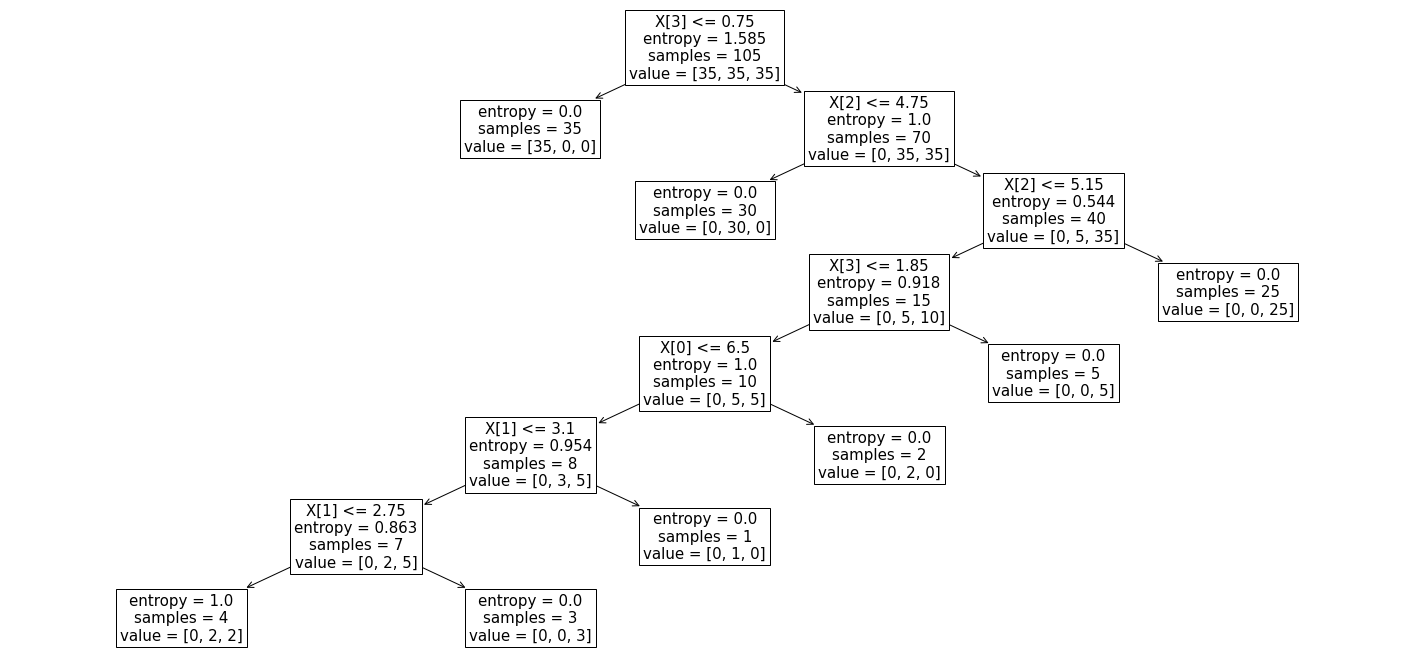

In [33]:
fig, ax = plt.subplots(figsize=(25,12))
tree.plot_tree(dtc_C4_5.fit(xtrain,ytrain),fontsize=15)

#회귀나무

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

#random dataset 만들기
rng= np.random.RandomState(1)
xran=np.sort(5*rng.rand(80,1), axis=0)
yran=np.sin(xran).ravel()
yran[::5]+=3*(0.5-rng.rand(16))
yran

array([-1.1493464 ,  0.09131401,  0.09668352,  0.13651039,  0.19403525,
       -0.12383814,  0.26365828,  0.41252216,  0.44546446,  0.47215529,
       -0.26319138,  0.49351799,  0.60530013,  0.63450933,  0.64144608,
        1.09900119,  0.66957978,  0.66968122,  0.73574834,  0.75072053,
        1.4926134 ,  0.8363043 ,  0.8532893 ,  0.87144496,  0.97060533,
       -0.20183403,  0.99131122,  0.99472837,  0.99825213,  0.99999325,
        1.21570343,  0.98769965,  0.98591565,  0.9159044 ,  0.91406986,
       -0.51669013,  0.8775346 ,  0.87063055,  0.86993408,  0.86523559,
        0.37007575,  0.78464608,  0.63168655,  0.53722799,  0.45801971,
        0.08075119,  0.43272116,  0.34115328,  0.26769953,  0.20730318,
        1.34959235, -0.17645185, -0.20918837, -0.24990778, -0.28068224,
       -1.63529379, -0.31247075, -0.31458595, -0.32442911, -0.34965155,
       -0.29371122, -0.46921115, -0.56401144, -0.57215326, -0.57488849,
       -0.95586361, -0.75923066, -0.78043659, -0.85808859, -0.94

In [36]:
regr_1=DecisionTreeRegressor(max_depth=2)
regr_2=DecisionTreeRegressor(max_depth=5)
regr_1.fit(xran,yran)
regr_2.fit(xran,yran)

y_pred_1=regr_1.predict(xran)
y_pred_2=regr_2.predict(xran)

In [37]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(yran,y_pred_1))
print(mean_squared_error(yran,y_pred_2))

0.12967126328231798
0.025236948989861896


##예측

In [39]:
#test를 위한 random값 만들기
xtest_ran=np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

y_pred_1=regr_1.predict(xtest_ran)
y_pred_2=regr_2.predict(xtest_ran)

##시각화

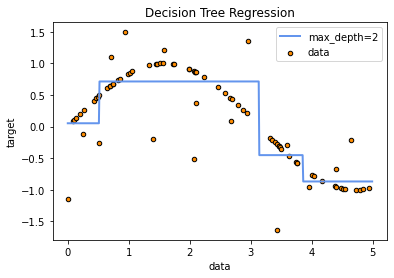

In [40]:
plt.figure()
plt.scatter(xran,yran,s=20,edgecolor="black", c="darkorange",label="data")
plt.plot(xtest_ran,y_pred_1,color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

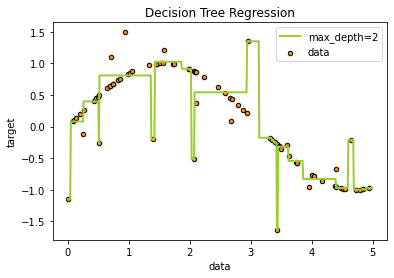

In [41]:
plt.figure()
plt.scatter(xran,yran,s=20,edgecolor="black", c="darkorange",label="data")
plt.plot(xtest_ran,y_pred_2,color="yellowgreen", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()